In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

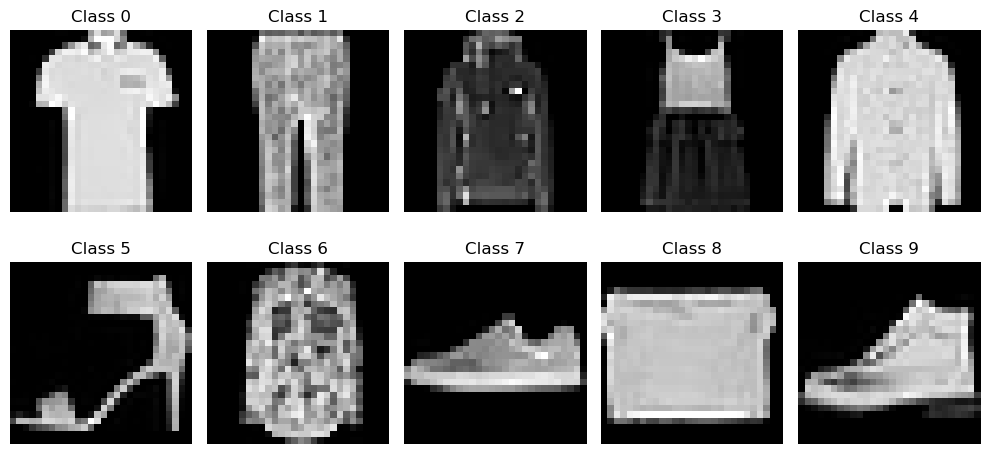

In [3]:
indices = [np.random.choice(np.where(y_train == c)[0]) for c in range(10)]
# print(indices)

m = x_train.shape[0]

fig, axes = plt.subplots(2, 5, figsize=(10, 5)) 
axes = axes.ravel()

for i, idx in enumerate(indices):
    axes[i].imshow(x_train[idx], cmap="gray")  # Display image
    axes[i].set_title(f"Class {i}")  # Set title
    axes[i].axis("off")  # Hide axes

plt.tight_layout()
plt.show()

In [78]:
class neural_network:
    def __init__(self, input_size=784, num_layers=3, output_size=10, hidden_layer_size=[128,64,32]):
        self.input_size = input_size
        self.num_layers = num_layers # L-1
        self.output_size = output_size
        self.hidden_layer_size = hidden_layer_size
        self.layer_size = np.hstack(([input_size],hidden_layer_size,[output_size]))
        self.weights = {f"W{i+1}": np.random.randn(self.layer_size[i+1], self.layer_size[i]) for i in range(self.num_layers + 1)}
        self.biases = {f"b{i+1}": np.random.randn(self.layer_size[i+1],1) for i in range(self.num_layers + 1)}
        self.a = {f"a{i+1}": np.zeros((self.layer_size[i+1],1)) for i in range(self.num_layers + 1)}        
        self.h = {f"h{i+1}": np.zeros((self.layer_size[i+1],1)) for i in range(self.num_layers + 1)}

    def activation(self, a):
        return 1/(1+np.exp(-a))

    def output(self, a):
        return np.exp(a)/np.sum(np.exp(a))

    def forward_propagation(self, input):
        self.a["a1"] = np.matmul(self.weights["W1"], input) + self.biases["b1"]
        for i in range(1,self.num_layers + 1):
            self.h[f"h{i}"] = self.activation(self.a[f"a{i}"])
            self.a[f"a{i+1}"] = np.matmul(self.weights[f"W{i+1}"], self.h[f"h{i}"]) + self.biases[f"b{i+1}"]
        self.h[f"h{self.num_layers+1}"] = self.output(self.a[f"a{self.num_layers+1}"])
        return self.h[f"h{self.num_layers+1}"]

nn = neural_network()

In [82]:
x = np.random.randn(784,1)
y = nn.forward_propagation(x)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
